<a href="https://colab.research.google.com/github/yashps7/shotmap/blob/main/Shotmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shotmap
We first scrape data from understats website to get shot data and then using library mplsoccer we built shotmap of that player.

In [1]:
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import requests
from bs4 import BeautifulSoup
import json

In [3]:
base_url = 'https://understat.com/match/'
match = str(input('Please enter match id: '))
url = base_url + match

Please enter match id: 22194


In [4]:
url

'https://understat.com/match/22194'

In [5]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [6]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var shotsData 	= JSON.parse('\x7B\x22h\x22\x3A\x5B\x7B\x22id\x22\x3A\x22570804\x22,\x22minute\x22\x3A\x225\x22,\x22result\x22\x3A\x22MissedShots\x22,\x22X\x22\x3A\x220.925\x22,\x22Y\x22\x3A\x220.4420000076293945\x22,\x22xG\x22\x3A\x220.040837112814188004\x22,\x22player\x22\x3A\x22Pape\x20Sarr\x22,\x22h_a\x22\x3A\x22h\x22,\x22player_id\x22\x3A\x229021\x22,\x22situation\x22\x3A\x22OpenPlay\x22,\x22season\x22\x3A\x222023\x22,\x22shotType\x22\x3A\x22Head\x22,\x22match_id\x22\x3A\x2222194\x22,\x22h_team\x22\x3A\x22Tottenham\x22,\x22a_team\x22\x3A\x22Luton\x22,\x22h_goals\x22\x3A\x222\x22,\x22a_goals\x22\x3A\x221\x22,\x22date\x22\x3A\x222024\x2D03\x2D30\x2015\x3A00\x3A00\x22,\x22player_assisted\x22\x3A\x22Timo\x20Werner\x22,\x22lastAction\x22\x3A\x22Aerial\x22\x7D,\x7B\x22id\x22\x3A\x22570805\x22,\x22minute\x22\x3A\x2214\x22,\x22result\x22

In [7]:
strings = scripts[1].string

In [8]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22570804\\x22,\\x22minute\\x22\\x3A\\x225\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.925\\x22,\\x22Y\\x22\\x3A\\x220.4420000076293945\\x22,\\x22xG\\x22\\x3A\\x220.040837112814188004\\x22,\\x22player\\x22\\x3A\\x22Pape\\x20Sarr\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x229021\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222023\\x22,\\x22shotType\\x22\\x3A\\x22Head\\x22,\\x22match_id\\x22\\x3A\\x2222194\\x22,\\x22h_team\\x22\\x3A\\x22Tottenham\\x22,\\x22a_team\\x22\\x3A\\x22Luton\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222024\\x2D03\\x2D30\\x2015\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Timo\\x20Werner\\x22,\\x22lastAction\\x22\\x3A\\x22Aerial\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22570805\\x22,\\x22minute\\x22\\x3A\\x2214\\x22,\\x22result\\x22\\x3A\\x22MissedShots\

In [9]:
idx_start = strings.index("('")+2
idx_end = strings.index("')")

json_data = strings[idx_start:idx_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data)

In [10]:
data

{'h': [{'id': '570804',
   'minute': '5',
   'result': 'MissedShots',
   'X': '0.925',
   'Y': '0.4420000076293945',
   'xG': '0.040837112814188004',
   'player': 'Pape Sarr',
   'h_a': 'h',
   'player_id': '9021',
   'situation': 'OpenPlay',
   'season': '2023',
   'shotType': 'Head',
   'match_id': '22194',
   'h_team': 'Tottenham',
   'a_team': 'Luton',
   'h_goals': '2',
   'a_goals': '1',
   'date': '2024-03-30 15:00:00',
   'player_assisted': 'Timo Werner',
   'lastAction': 'Aerial'},
  {'id': '570805',
   'minute': '14',
   'result': 'MissedShots',
   'X': '0.9080000305175782',
   'Y': '0.5820000076293945',
   'xG': '0.3222470283508301',
   'player': 'Timo Werner',
   'h_a': 'h',
   'player_id': '65',
   'situation': 'OpenPlay',
   'season': '2023',
   'shotType': 'LeftFoot',
   'match_id': '22194',
   'h_team': 'Tottenham',
   'a_team': 'Luton',
   'h_goals': '2',
   'a_goals': '1',
   'date': '2024-03-30 15:00:00',
   'player_assisted': 'Dejan Kulusevski',
   'lastAction': 'Ta

In [22]:
from datetime import datetime

awayTeam = data['h'][0]['a_team']
print(awayTeam)

scrapedDate = data['h'][0]['date']
date_object = datetime.strptime(scrapedDate, "%Y-%m-%d %H:%M:%S")     # Parse the date string into a datetime object
date = date_object.strftime("%d %B, %Y")                              # Format the datetime object to the desired format
print(date)

Luton
30 March, 2024


In [23]:
x = []
y = []
player = []
assister = []
outcome = []
xg = []
team = []
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
  for key in data_home[index]:
    if key == 'X':
      x.append(data_home[index][key])
    if key == 'Y':
      y.append(data_home[index][key])
    if key == 'player':
      player.append(data_home[index][key])
    if key == 'player_assisted':
      assister.append(data_home[index][key])
    if key == 'result':
      outcome.append(data_home[index][key])
    if key == 'xG':
      xg.append(data_home[index][key])
    if key == 'h_team':
      team.append(data_home[index][key])


for index in range(len(data_away)):
  for key in data_away[index]:
    if key == 'X':
      x.append(data_away[index][key])
    if key == 'Y':
      y.append(data_away[index][key])
    if key == 'player':
      player.append(data_away[index][key])
    if key == 'player_assisted':
      assister.append(data_away[index][key])
    if key == 'result':
      outcome.append(data_away[index][key])
    if key == 'xG':
      xg.append(data_away[index][key])
    if key == 'a_team':
      team.append(data_away[index][key])

In [24]:
col_names = ['x', 'y', 'player', 'assister', 'outcome', 'xg', 'team']
df = pd.DataFrame([x, y, player, assister, outcome, xg, team], index=col_names)
df =df.T

In [25]:
df

,x,y,player,assister,outcome,xg,team
0,0.925,0.4420000076293945,Pape Sarr,Timo Werner,MissedShots,0.040837112814188004,Tottenham
1,0.9080000305175782,0.5820000076293945,Timo Werner,Dejan Kulusevski,MissedShots,0.3222470283508301,Tottenham
2,0.9380000305175781,0.3340000152587891,Son Heung-Min,Dejan Kulusevski,ShotOnPost,0.5555652976036072,Tottenham
3,0.8919999694824219,0.6170000076293946,Timo Werner,None,BlockedShot,0.06326454132795334,Tottenham
4,0.8590000152587891,0.5070000076293946,Pape Sarr,None,BlockedShot,0.06566553562879562,Tottenham
5,0.7980000305175782,0.3060000038146973,Son Heung-Min,Dejan Kulusevski,BlockedShot,0.020302696153521538,Tottenham
6,0.8690000152587891,0.4979999923706055,Son Heung-Min,Timo Werner,BlockedShot,0.09832467883825302,Tottenham
7,0.8980000305175782,0.509000015258789,Son Heung-Min,Brennan Johnson,BlockedShot,0.07667271792888641,Tottenham
8,0.8909999847412109,0.46599998474121096,Son Heung-Min,Pedro Porro,SavedShot,0.09320543706417084,Tottenham
9,0.769000015258789,0.37900001525878907,Brennan Johnson,Yves Bissouma,BlockedShot,0.029922155663371086,Tottenham


In [26]:
df.to_csv('MatchData.csv', index=None)

In [27]:
text_color = 'w'

In [28]:
data = pd.read_csv('/content/MatchData.csv')

In [29]:
data

,x,y,player,assister,outcome,xg,team
0,0.925,0.442,Pape Sarr,Timo Werner,MissedShots,0.040837,Tottenham
1,0.908,0.582,Timo Werner,Dejan Kulusevski,MissedShots,0.322247,Tottenham
2,0.938,0.334,Son Heung-Min,Dejan Kulusevski,ShotOnPost,0.555565,Tottenham
3,0.892,0.617,Timo Werner,NaN,BlockedShot,0.063265,Tottenham
4,0.859,0.507,Pape Sarr,NaN,BlockedShot,0.065666,Tottenham
5,0.798,0.306,Son Heung-Min,Dejan Kulusevski,BlockedShot,0.020303,Tottenham
6,0.869,0.498,Son Heung-Min,Timo Werner,BlockedShot,0.098325,Tottenham
7,0.898,0.509,Son Heung-Min,Brennan Johnson,BlockedShot,0.076673,Tottenham
8,0.891,0.466,Son Heung-Min,Pedro Porro,SavedShot,0.093205,Tottenham
9,0.769,0.379,Brennan Johnson,Yves Bissouma,BlockedShot,0.029922,Tottenham


In [30]:
name = input("Enter Player Name: ")

Enter Player Name: Son Heung-Min


In [31]:
player = data[data['player']== name]

In [32]:
player

,x,y,player,assister,outcome,xg,team
2,0.938,0.334,Son Heung-Min,Dejan Kulusevski,ShotOnPost,0.555565,Tottenham
5,0.798,0.306,Son Heung-Min,Dejan Kulusevski,BlockedShot,0.020303,Tottenham
6,0.869,0.498,Son Heung-Min,Timo Werner,BlockedShot,0.098325,Tottenham
7,0.898,0.509,Son Heung-Min,Brennan Johnson,BlockedShot,0.076673,Tottenham
8,0.891,0.466,Son Heung-Min,Pedro Porro,SavedShot,0.093205,Tottenham
15,0.866,0.555,Son Heung-Min,Brennan Johnson,Goal,0.129310,Tottenham


In [33]:
player['boolean']=player['outcome']=='Goal'

<ipython-input-33-254bfcf89906>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player['boolean']=player['outcome']=='Goal'


In [34]:
player

,x,y,player,assister,outcome,xg,team,boolean
2,0.938,0.334,Son Heung-Min,Dejan Kulusevski,ShotOnPost,0.555565,Tottenham,False
5,0.798,0.306,Son Heung-Min,Dejan Kulusevski,BlockedShot,0.020303,Tottenham,False
6,0.869,0.498,Son Heung-Min,Timo Werner,BlockedShot,0.098325,Tottenham,False
7,0.898,0.509,Son Heung-Min,Brennan Johnson,BlockedShot,0.076673,Tottenham,False
8,0.891,0.466,Son Heung-Min,Pedro Porro,SavedShot,0.093205,Tottenham,False
15,0.866,0.555,Son Heung-Min,Brennan Johnson,Goal,0.129310,Tottenham,True


In [35]:
player.reset_index(inplace = True)

In [36]:
player.columns

Index(['index', 'x', 'y', 'player', 'assister', 'outcome', 'xg', 'team',
       'boolean'],
      dtype='object')

In [37]:
player

,index,x,y,player,assister,outcome,xg,team,boolean
0,2,0.938,0.334,Son Heung-Min,Dejan Kulusevski,ShotOnPost,0.555565,Tottenham,False
1,5,0.798,0.306,Son Heung-Min,Dejan Kulusevski,BlockedShot,0.020303,Tottenham,False
2,6,0.869,0.498,Son Heung-Min,Timo Werner,BlockedShot,0.098325,Tottenham,False
3,7,0.898,0.509,Son Heung-Min,Brennan Johnson,BlockedShot,0.076673,Tottenham,False
4,8,0.891,0.466,Son Heung-Min,Pedro Porro,SavedShot,0.093205,Tottenham,False
5,15,0.866,0.555,Son Heung-Min,Brennan Johnson,Goal,0.129310,Tottenham,True


In [38]:
!pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 62.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


Text(0.5, 1.0, 'Tottenham Shot Map')

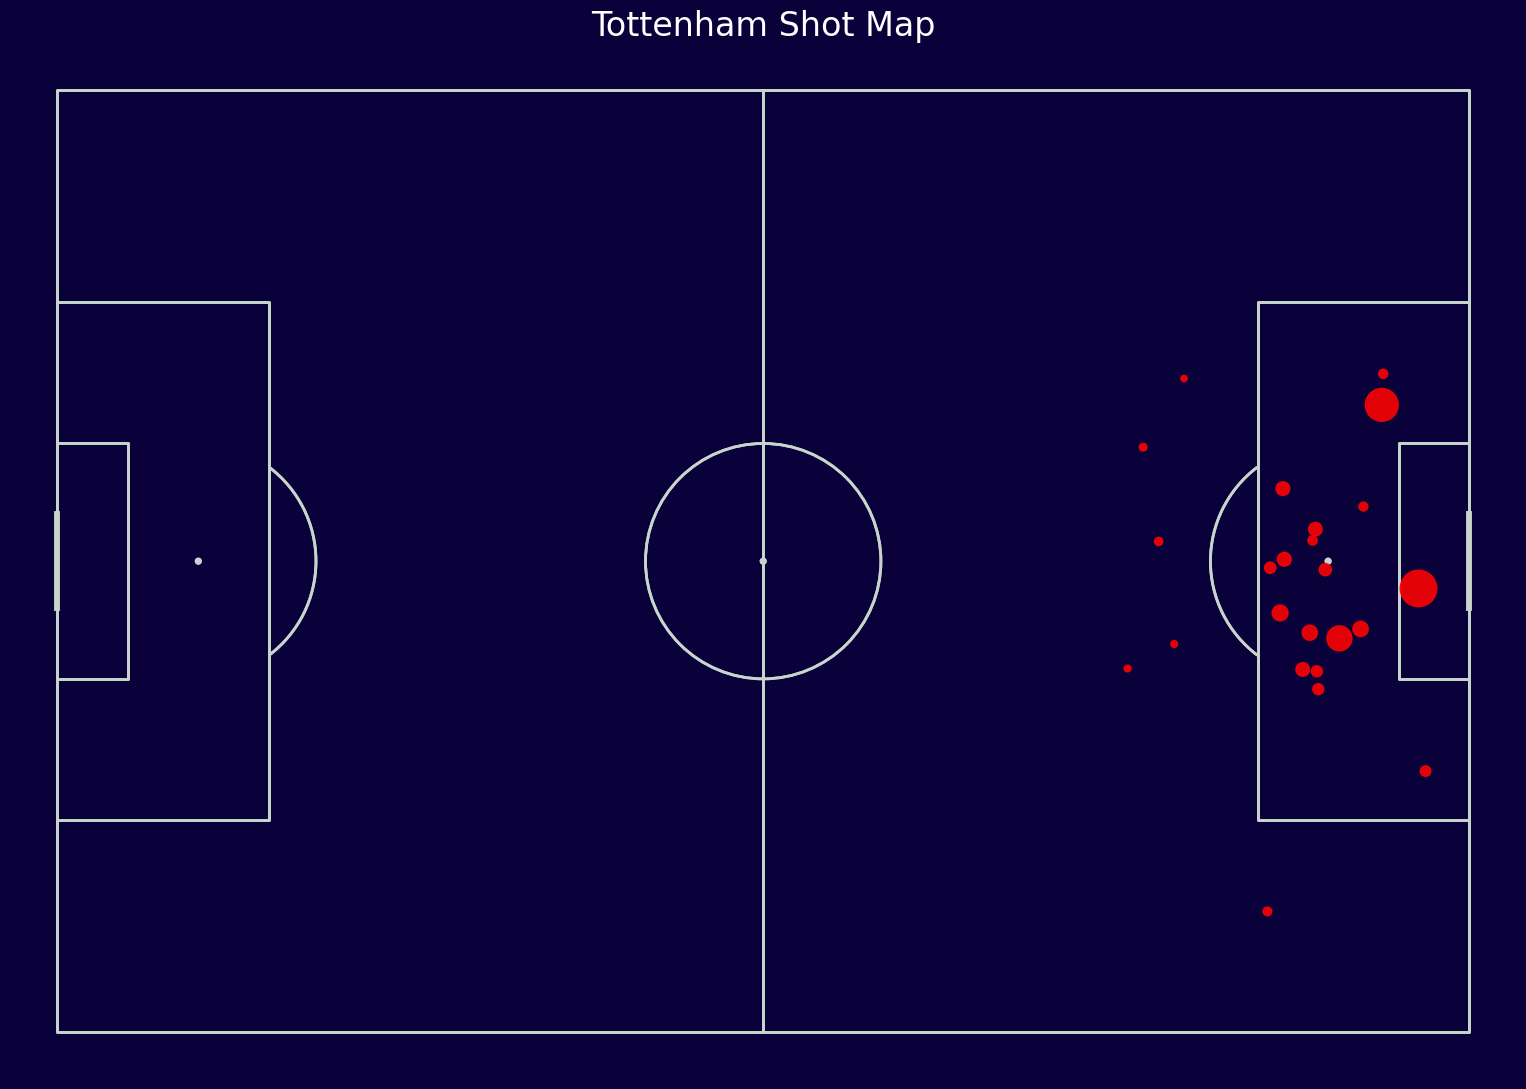

In [48]:
#from matplotlib.colorbar import constrained_layout
#fig, ax = plt.subplots(figsize=(18, 13))
#fig.set_facecolor('#22312b')
#ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#0a013b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=True)
fig.set_facecolor('#0a013b')
ax.patch.set_facecolor('#0a013b')

#plt.gca().invert_yaxis()

plt.scatter(data['x']*120, data['y']*80, c='#fa0202', s=1000*data['xg'], alpha=0.9)

pitch.draw(ax=ax)
team = data['team'][0]
plt.title(f"{team} Shot Map", fontsize=24, c=text_color)

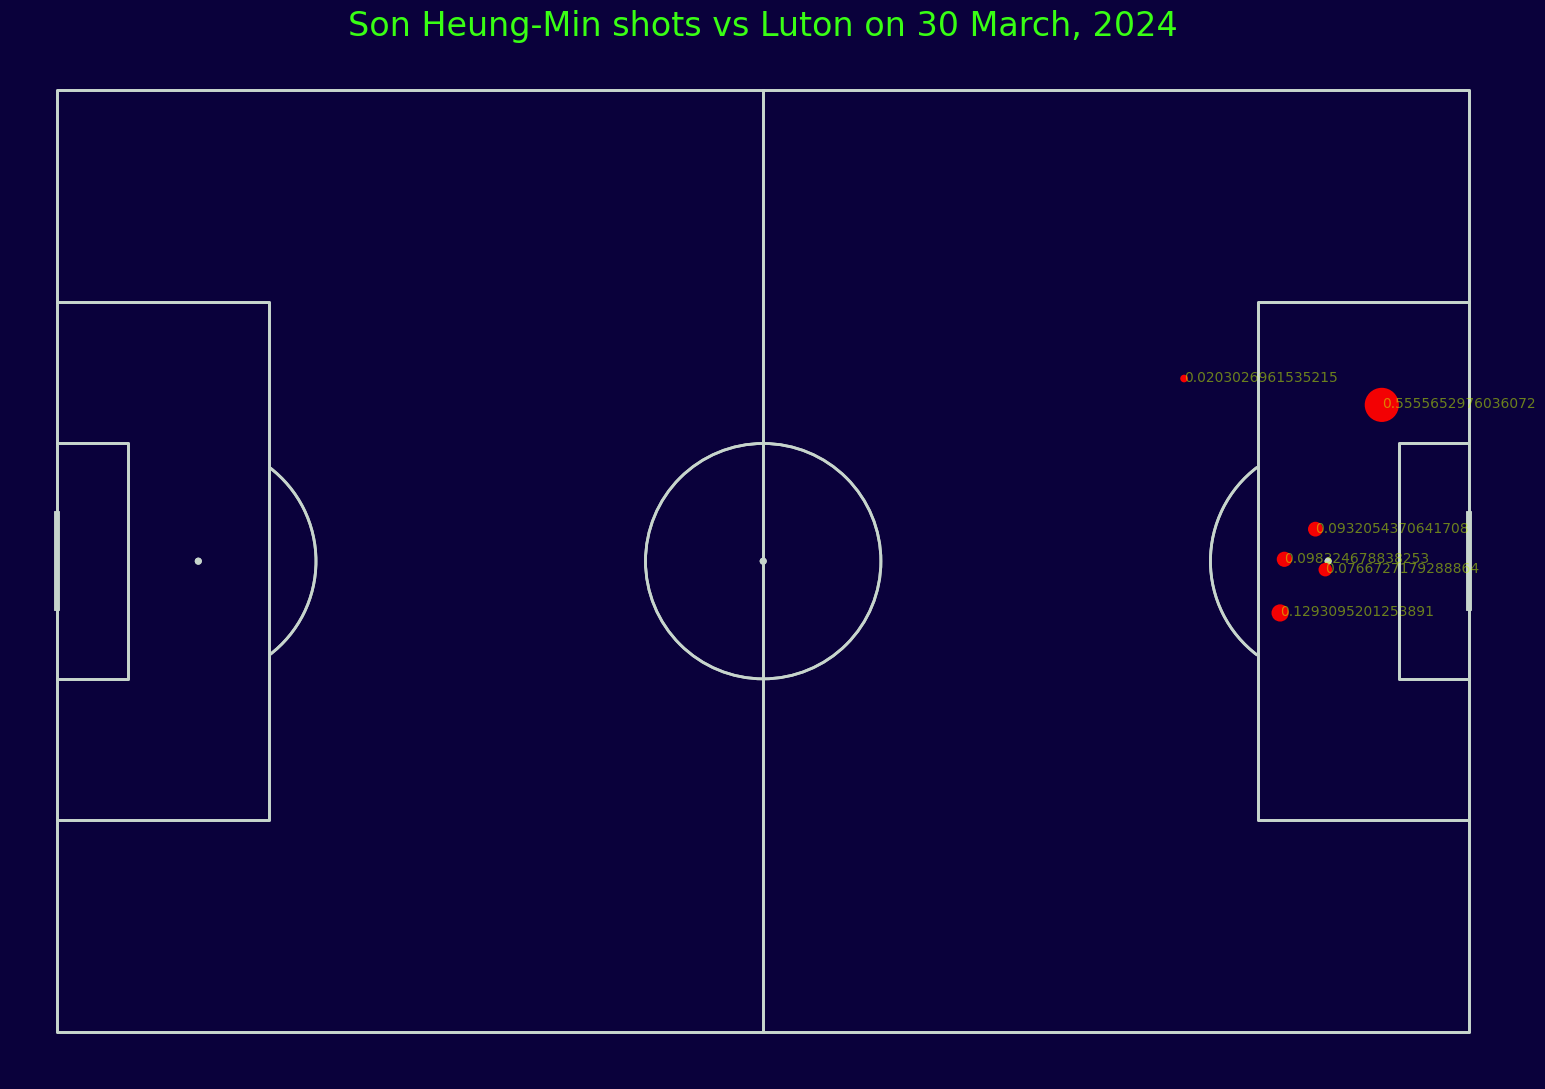

In [52]:
#from matplotlib.colorbar import constrained_layout
#fig, ax = plt.subplots(figsize=(18, 13))
#fig.set_facecolor('#22312b')
#ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#0a013b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=True)
fig.set_facecolor('#0a013b')
ax.patch.set_facecolor('#0a013b')

#plt.gca().invert_yaxis()
plt.scatter(player['x']*120, player['y']*80, c='#fa0202', s=1000*player['xg'], alpha=0.975)

for i in range(len(player)):
  plt.annotate(player.xg[i], (player.x[i]*120, player.y[i]*80 + 0.2), alpha=0.5, color='#ccff00', size=10)
  #print(i)

pitch.draw(ax=ax)

plt.title(f'{name} shots vs {awayTeam} on {date}', fontsize=24, c='#39FF14')
plt.show()

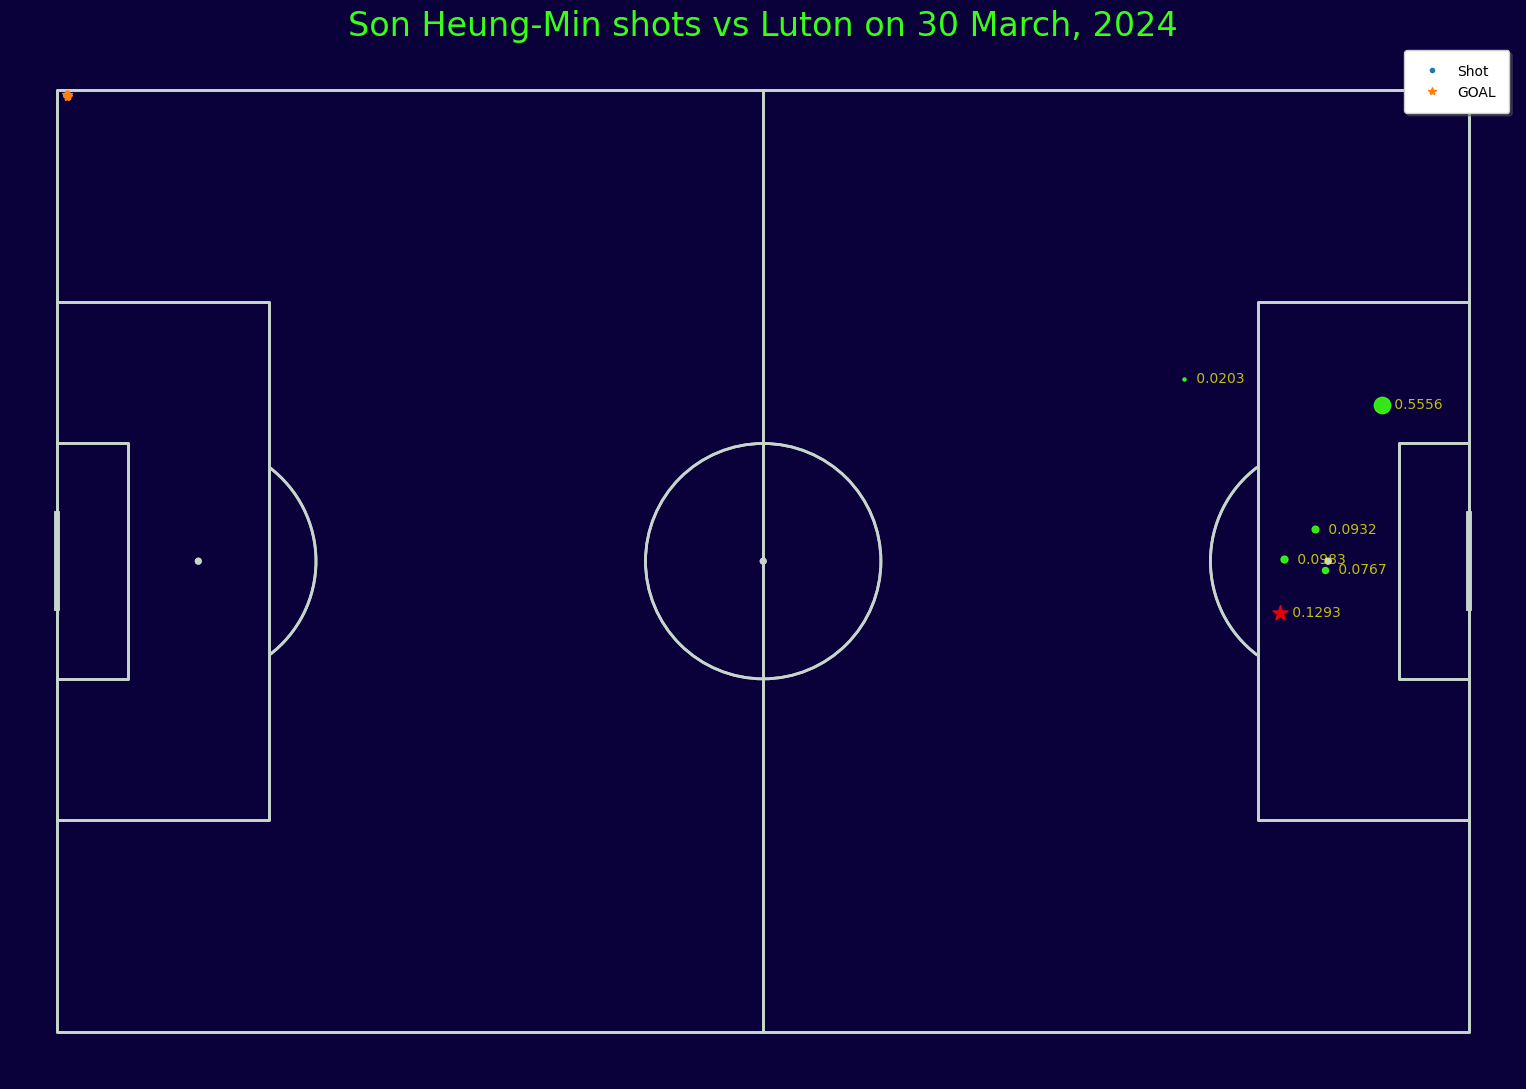

In [69]:
#from matplotlib.colorbar import constrained_layout
#fig, ax = plt.subplots(figsize=(18, 13))
#fig.set_facecolor('#22312b')
#ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#0a013b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=True)
fig.set_facecolor('#0a013b')
ax.patch.set_facecolor('#0a013b')

#plt.gca().invert_yaxis()

markers = ['*' if (player.boolean[i] == True) | (player.outcome[i] == 'Goal') else '.' for i in range(len(player))]
colors = ['#fa0202' if (player.boolean[i] == True) | (player.outcome[i] == 'Goal') else '#39FF14' for i in range(len(player))]
#print(markers)

for i in range(len(player)):
  plt.scatter(player.x[i]*120, player.y[i]*80, c=colors[i], s=1000*player.xg[i], alpha=0.9, marker=markers[i])

for i in range(len(player)):
  plt.annotate(f"{player.xg[i]: .4f}", (player.x[i]*120 + 0.7, player.y[i]*80 + 0.3), alpha=0.75, color='#FDFF00', size=10)
  #print(i)

ax.plot(player.x, player.y, '.', label='Shot')
ax.plot(player.x, player.y, '*', label='GOAL')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

pitch.draw(ax=ax)

plt.title(f'{name} shots vs {awayTeam} on {date}', fontsize=24, c='#39FF14')
plt.show()